#Deep learning multi-classification

CIFAR-10 dataset consistis of 6 millions of class, those images 32x32 colours

site: https://www.cs.toronto.edu/~kriz/cifar.html

In [18]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
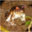

In [13]:
X_train[0]

In [31]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train.shape

(50000, 32, 32, 3)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [33]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [34]:
# convert 0..9 number one hot encode
class_train = to_categorical(y_train, num_classes=10)
class_test = to_categorical(y_test, num_classes=10)
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
multiclassificator = Sequential()
# standarlization image to 32x32, all images are different size
# 3 channel RGB
multiclassificator.add(InputLayer(shape=(32,32,3)))
multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Flatten())

multiclassificator.add(Dense(128, activation='relu'))
multiclassificator.add(Dropout(0.2))
multiclassificator.add(Dense(128, activation='relu'))
multiclassificator.add(Dropout(0.2))
multiclassificator.add(Dense(10, activation='softmax'))
multiclassificator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,786 (686.66 KB)

 Trainable params: 175,658 (686.16 KB)

 Non-trainable params: 128 (512.00 B)

In [43]:
multiclassificator.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [44]:
multiclassificator.fit(X_train,
                       class_train,
                       batch_size=64,
                       epochs=15,
                       validation_data=(X_test, class_test),
                       verbose = 1)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.8963 - loss: 0.2983 - val_accuracy: 0.5949 - val_loss: 1.6543
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9068 - loss: 0.2691 - val_accuracy: 0.6568 - val_loss: 1.4627
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9072 - loss: 0.2726 - val_accuracy: 0.6488 - val_loss: 1.3330
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9093 - loss: 0.2647 - val_accuracy: 0.5976 - val_loss: 1.7499
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9048 - loss: 0.2772 - val_accuracy: 0.6681 - val_loss: 1.4282
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9137 - loss: 0.2541 - val_accuracy: 0.6404 - val_loss: 1.8089
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.9114 - loss: 0.2543 - val_accuracy: 0.6557 - val_loss: 1.4566
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9197 - loss: 0.2332 - 

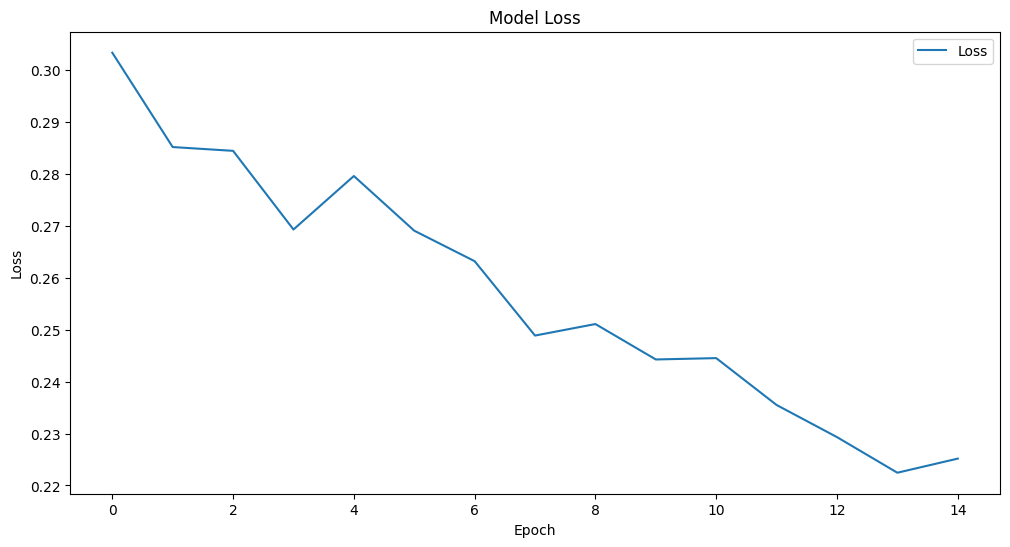

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(multiclassificator.history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [47]:
_, accuracy = multiclassificator.evaluate(X_test, class_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 64.62
